In [729]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [730]:
df=pd.read_csv('datasets/Churn_Modelling.csv')

In [731]:
df.shape

(10000, 14)

In [732]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [734]:
df.duplicated().sum()

0

In [735]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [736]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [737]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [738]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [739]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## one hot encoder 

## get_dummies
import pandas as pd 

data = {           
    "color": ["red", "blue", "green", "blue", "red"]
}

df = pd.DataFrame(data)  

one_hot = pd.get_dummies(df["color"])  



## One-hot encoder 
import pandas as pd                 

from sklearn.preprocessing import OneHotEncoder  

data = {                           

    "color": ["red", "blue", "green", "blue", "red"]
}


df = pd.DataFrame(data)             

encoder = OneHotEncoder(sparse=False)         #sets for normal numpy array instead of sparse matrix in the code 

encoded_array = encoder.fit_transform(df[["color"]])  

print(encoded_array)
                
print(encoder.get_feature_names_out(["color"]))  




In [740]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo=OneHotEncoder()
geo_encoder = onehot_encoder_geo.fit_transform(df[['Geography','Gender']])
geo_encoder

<10000x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20000 stored elements in Compressed Sparse Row format>

In [741]:
geo_encoder.toarray()

array([[1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [742]:
onehot_encoder_geo.get_feature_names_out(['Geography','Gender'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'], dtype=object)

In [743]:
geo_encoder_df=pd.DataFrame(geo_encoder.toarray(),columns=onehot_encoder_geo.get_feature_names_out(['Geography','Gender']))
geo_encoder_df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0
9996,1.0,0.0,0.0,0.0,1.0
9997,1.0,0.0,0.0,1.0,0.0
9998,0.0,1.0,0.0,0.0,1.0


In [744]:
geo_encoder_df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0
9996,1.0,0.0,0.0,0.0,1.0
9997,1.0,0.0,0.0,1.0,0.0
9998,0.0,1.0,0.0,0.0,1.0


In [745]:
df=pd.concat([df,geo_encoder_df],axis=1)
df.drop(columns=['Geography','Gender'],inplace=True)


In [746]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,0.0,1.0


In [747]:
## save the encoderrs and scaler 
import pickle 
with open("onehot_encoder_geo.pkl",'wb') as file :
    pickle.dump(onehot_encoder_geo,file)

In [748]:
from sklearn.model_selection import train_test_split

In [749]:
x=df.drop(columns=['Exited'])
y=df['Exited']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [750]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0,0.0,1.0


In [751]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [752]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,0.0,1.0,0.0,0.0,1.0
5140,626,29,4,105767.28,2,0,0,41104.82,1.0,0.0,0.0,1.0,0.0
2568,612,47,6,130024.87,1,1,1,45750.21,0.0,1.0,0.0,1.0,0.0
3671,646,52,6,111739.40,2,0,1,68367.18,0.0,1.0,0.0,1.0,0.0
7427,714,33,8,122017.19,1,0,0,162515.17,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,0.0,1.0,0.0,0.0,1.0
7813,684,63,3,81245.79,1,1,0,69643.31,0.0,1.0,0.0,1.0,0.0
905,672,45,9,0.00,1,1,1,92027.69,1.0,0.0,0.0,1.0,0.0
5192,663,39,8,0.00,2,1,1,101168.90,1.0,0.0,0.0,1.0,0.0


In [753]:
Y_train.shape

(8000,)

In [754]:
X_train.shape

(8000, 13)

In [755]:
X_test.shape
Y_train.shape

(8000,)

In [756]:
from sklearn.preprocessing import StandardScaler

In [757]:
scaler=StandardScaler()

In [758]:
X_train_scaled = scaler.fit_transform(X_train)

In [759]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ..., -0.57273139,
        -0.91509065,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.57273139,
         1.09278791, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ..., -0.57273139,
         1.09278791, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.57273139,
         1.09278791, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.57273139,
         1.09278791, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ..., -0.57273139,
        -0.91509065,  0.91509065]])

In [760]:
X_test_scaled=scaler.transform(X_test)

In [761]:
X_test_scaled ## every array is one customer in this 

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.57273139,
        -0.91509065,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.57273139,
        -0.91509065,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.57273139,
         1.09278791, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ...,  1.74601919,
        -0.91509065,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ..., -0.57273139,
         1.09278791, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ..., -0.57273139,
        -0.91509065,  0.91509065]])

In [762]:
import tensorflow 


In [763]:
from tensorflow import keras

In [764]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

Keras Sequential models stack layers linearly (single input/output path), Functional API enables complex graphs with branching/shared layers, and Model Subclassing allows full custom logic via inheritance—each suits different architectures from simple perceptrons to advanced multi-input networks

from keras import layers, Sequential

model = Sequential

([
    layers.Dense(64, activation='relu', input_shape=(8,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


Incrementally: model.add(layers.Dense(...))



Functional API: Arbitrary Graphs
Defines tensors explicitly for multi-input (e.g., tabular+image), skip connections, or shared weights.

inputs = layers.Input(shape=(8,))

x1 = layers.Dense(64, activation='relu')(inputs)
x2 = layers.Dense(32, activation='relu')(x1)
x3 = layers.Dense(16, activation='relu')(inputs) 

outputs = layers.Dense(1, activation='sigmoid')([x2, x3])

model = keras.Model(inputs, outputs)


In [765]:
X_train_scaled
model=Sequential()
model.add(Dense(50,activation='relu',input_dim=(X_train_scaled.shape[1])))  ## HL1
model.add(Dense(80,activation='relu'))                                     ## HL2
model.add(Dense(1,activation='sigmoid'))

c:\Users\Welcome\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [766]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 50)             │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 80)             │         4,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,861 (18.99 KB)

 Trainable params: 4,861 (18.99 KB)

 Non-trainable params: 0 (0.00 B)

In [767]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.02)
loss=tensorflow.keras.losses.BinaryCrossentropy()
model.compile(loss=loss,optimizer=opt,metrics=['accuracy'])

In [768]:
##  SET up the tensorboard 
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime
log_dir="logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [769]:
EarlyStopping_callback=EarlyStopping(monitor='val_loss',patience=15,restore_best_weights=True)
history=model.fit(X_train_scaled,Y_train,validation_data=(X_test,Y_test),epochs=100,callbacks=[EarlyStopping_callback,tensorflow_callback])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8336 - loss: 0.4133 - val_accuracy: 0.7820 - val_loss: 6232.9243
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8514 - loss: 0.3621 - val_accuracy: 0.4660 - val_loss: 12555.9023
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8537 - loss: 0.3600 - val_accuracy: 0.7435 - val_loss: 2342.7815
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8575 - loss: 0.3511 - val_accuracy: 0.7925 - val_loss: 1447.7617
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8572 - loss: 0.3510 - val_accuracy: 0.7555 - val_loss: 6915.8877
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8593 - loss: 0.3472 - val_accuracy: 0.4650 - val_loss: 45345.5586
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8597 - loss: 0.3440 - val_accuracy: 0.5535 - val_loss: 5474.7441
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8584 - 

In [770]:
model.save('model.h5')

In [771]:
## load tensorboard extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [772]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 12164), started 2:01:18 ago. (Use '!kill 12164' to kill it.)

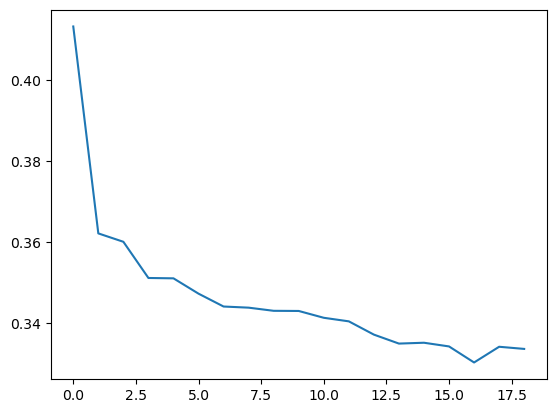

In [773]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])


In [774]:
model.layers[0].get_weights()

[array([[ 4.44970131e-02, -7.93881267e-02, -1.85645446e-01,
         -6.89955503e-02, -1.74904153e-01, -3.33811529e-02,
         -2.81562984e-01, -3.24295551e-01, -3.52269828e-01,
          1.98187903e-01,  1.09587833e-01, -2.98154235e-01,
          2.72284925e-01, -2.27461547e-01,  7.46702999e-02,
         -7.34561086e-02, -1.74871281e-01, -3.71947676e-01,
          6.03372753e-02, -2.60083467e-01,  3.04135352e-01,
          5.84958270e-02,  7.22142309e-02, -9.99773815e-02,
         -5.37078828e-02,  2.26377204e-01, -2.25629449e-01,
         -1.72105283e-01, -9.25566442e-03, -8.13876688e-02,
         -5.77770397e-02, -3.08121324e-01,  1.37988836e-01,
         -3.28145236e-01,  4.83212918e-01,  1.44430950e-01,
          2.20222354e-01,  4.63572234e-01,  5.74151911e-02,
          2.72987098e-01, -2.16306210e-01, -5.41542232e-01,
          6.10626750e-02,  9.06629413e-02,  4.91506718e-02,
         -1.69199273e-01,  1.61175013e-01, -3.23835254e-01,
         -2.43024349e-01,  2.00224370e-0

In [775]:
y_lod=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [776]:
y_pred=np.where(y_lod>0.5,1,0)

In [777]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8615

### Now we will load the trained model , scaler pickle , one hot 
 

In [778]:
from tensorflow.keras.models import load_model

model=load_model('model.h5')
import pickle
import pandas as pd 
import numpy as np 


In [779]:
## loading of the all trained models which we have created earlier 


In [780]:
with open('onehot_encoder_geo.pkl','rb') as file :
    One_hotencoder_geo=pickle.load(file)


In [781]:
input_data={
    'CreditScore':60000,
    'Geography':'India',
    'Gender':'Male',
    'Age':40,
    'Tenure':3,
    'Balance':600000000,
    'Numofproducts':2,
    'HasCrCard':4,
    'IsActiveMember':1,
    'EstimateSalary':5
}

In [782]:
geo_encoded= One_hotencoder_geo.transform([[input_data['Geography'],input_data['Gender']]]).toarray()

c:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


ValueError: Found unknown categories ['India'] in column 0 during transform

In [783]:
geo_encoder_df=pd.DataFrame(geo_encoded,columns=onehot_encoder_geo.get_feature_names_out(['Geography','Gender']))

In [784]:
geo_encoder_df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.0,0.0,0.0,0.0,1.0


In [785]:
input_data=pd.concat([input_data.reset_index(drop=True),geo_encoder_df],axis=1)
input_data

AttributeError: 'dict' object has no attribute 'reset_index'

In [786]:
input_data.drop(columns=['Geography','Gender'],inplace=True)

AttributeError: 'dict' object has no attribute 'drop'

In [787]:
input_scaled=scaler.fit_transform(input_data)
input_scaled




TypeError: float() argument must be a string or a real number, not 'dict'

In [788]:
print(model.input_shape)
print(input_scaled.shape)


(None, 13)
(1, 13)


In [789]:
prediction=model.predict(input_scaled)  
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[0.18479976]], dtype=float32)

In [790]:
prediction_proba=prediction[0][0]

In [791]:
prediction_proba

0.18479976

In [792]:
if prediction_proba > 0.5:
    print('the customer is likely to churn.')
else:
    print('the customer is not likely to churn.')

the customer is not likely to churn.
